In [1]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib
import scipy
import numpy as np
import seaborn as sns

In [2]:

CVD = pd.read_csv('/content/full_data (1).csv')
#print(CVD.head())
#print(CVD.dtypes)

#dateFormat = '%Y-%m-%d'
# Convert string values of date to datetime format
CVD['date'] = [dt.datetime.strptime(x,'%d-%m-%Y') for x in CVD['date']]
#print(CVD.dtypes)
#Check for missing data
print(CVD.isnull().sum()) #No missing data


date                0
location            0
new_cases         333
new_deaths        333
total_cases      3303
total_deaths    12940
dtype: int64


In [3]:


# Assuming your DataFrame is named 'CVD'
CVD.fillna(0, inplace=True)

# Print the DataFrame to verify that null values have been replaced with 0
print(CVD.isnull().sum())


date            0
location        0
new_cases       0
new_deaths      0
total_cases     0
total_deaths    0
dtype: int64


In [6]:
CVD.columns = ['Date', 'Country', 'New Cases', 'New deaths', 'Total Cases', 'Total Deaths' ]

#Select all countries except for china and World
CVD_no_china = CVD.loc[~(CVD['Country'].isin(["China", "World"]))]

#Group them by location and date, select only total cases and deaths for closer observation
#Reset index because groupby by default makes grouped columns indices
CVD_no_china = pd.DataFrame(CVD_no_china.groupby(['Country', 'Date'])[['Total Cases', 'Total Deaths']].sum()).reset_index()
#print(CVD_no_china)

#Sort values by each country and by date - descending. Easy to interpret plots
CVD_no_china = CVD_no_china.sort_values(by = ['Country','Date'], ascending=False)
#print(CVD_no_china)

(y = Ae^(Bx)) A: 5.682285258982877e-15, B: 0.1999999993925753

Expected cases for the next 5 days: 
 [1.37255325e-07 1.67644032e-07 2.04760883e-07 2.50095507e-07
 3.05467342e-07]


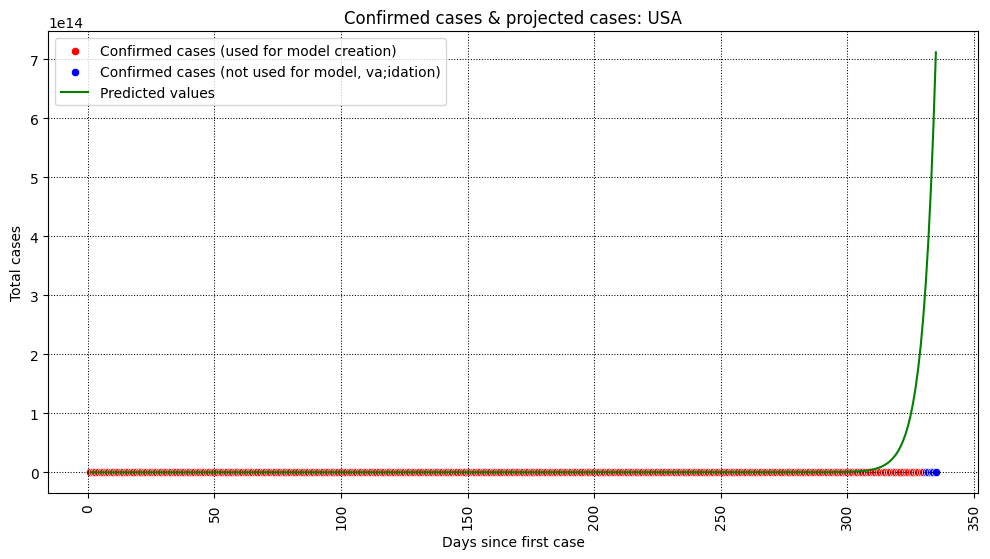

In [7]:
def plot_exponential_fit_data(d_df, title, delta):
    d_df = d_df.sort_values(by=['Date'], ascending=True)
    d_df['x'] = np.arange(len(d_df)) + 1  #Add column x to the dataframe
    d_df['y'] = d_df['Total Cases']   #Add column y to the dataframe

    x = d_df['x'][:-delta]  #Remove delta number of data points (so we can predict them)
    y = d_df['y'][:-delta]  #Remove delta number of data points (so we can predict them)

#Use non-linear least squares to fit a function, f, to data.
#Let us fit data to exponential function: #y = Ae^(Bt)

    c2 = scipy.optimize.curve_fit(lambda t, a, b: a*np.exp(b*t),  x,  y,  p0=(20, 0.2))
# Function: lambda t, a, b: a*np.exp(b*t)
# xm y and po for initial values.

    A, B = c2[0]  #Coefficients
    print(f'(y = Ae^(Bx)) A: {A}, B: {B}\n')
    x = range(1,d_df.shape[0] + 1)
    y_fit = A * np.exp(B * x)
#    print(y_fit)
    f, ax = plt.subplots(1,1, figsize=(12,6))
    g = sns.scatterplot(x=d_df['x'][:-delta], y=d_df['y'][:-delta], label='Confirmed cases (used for model creation)', color='red')
    g = sns.scatterplot(x=d_df['x'][-delta:], y=d_df['y'][-delta:], label='Confirmed cases (not used for model, va;idation)', color='blue')
    g = sns.lineplot(x=x, y=y_fit, label='Predicted values', color='green')  #Predicted
    x_future=range(85,90) #As of 24 March 2020 we have 85 days of info.
    y_future=A * np.exp(B * x_future)
    print("Expected cases for the next 5 days: \n", y_future)
    plt.xlabel('Days since first case')
    plt.ylabel(f'Total cases')
    plt.title(f'Confirmed cases & projected cases: {title}')
    plt.xticks(rotation=90)
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()


CVD_USA = CVD_no_china[CVD_no_china['Country']=='United States']
CVD_Italy = CVD_no_china[CVD_no_china['Country']=='Italy']
CVD_South_Korea = CVD_no_china[CVD_no_china['Country']=='South Korea']

d_df = CVD_USA.copy()
plot_exponential_fit_data(d_df, 'USA', 5)
